### №1 Section for importing main libraries and defining main function

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics
import keras
import tensorflow as tf

from PIL import Image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential, load_model
from skimage.transform import resize
from tensorflow.keras.preprocessing import image as lb
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.compat.v1.keras.backend import set_session

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

def plot2figs(image1, image2, title):
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(image1, cmap=plt.cm.gray)
    plt.title('Original image')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(image2, cmap=plt.cm.gray)
    plt.title(title)
    plt.show()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1660 SUPER, pci bus id: 0000:08:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



### №2 Section for loading image

Original image


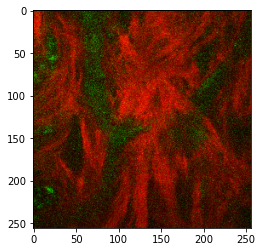

In [5]:
image = Image.open(os.path.join('../bin_data', 'collagen_color.png'))
print('Original image')
plt.imshow(image)
plt.show()

### №3 Section for CNN feature extraction

Visualizing computed CNN feature example


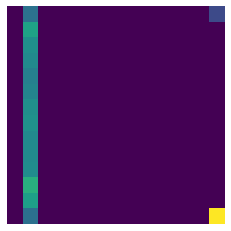

In [8]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

target_size=(224, 224)

image = np.asarray(image)
img = resize(image, target_size)
x = lb.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_tensor = preprocess_input(x)

block4_pool_features = model.predict(img_tensor)
print('Visualizing computed CNN feature example')
plt.imshow(block4_pool_features[0, :, :, 9], cmap='viridis')
plt.axis('off')
plt.show()